<h1>Normalization (Min max scaling) </h1>

<h2>Genral formula :- x' = ( x - x(min) / x(max) - x(min) )</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!kaggle datasets download -d yasserh/wine-quality-dataset -p sample_data

Dataset URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
License(s): CC0-1.0
  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 30.2MB/s]


In [3]:
!unzip sample_data/wine-quality-dataset.zip

Archive:  sample_data/wine-quality-dataset.zip
  inflating: WineQT.csv              


In [16]:
pd.read_csv('WineQT.csv')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [22]:
df = pd.read_csv('WineQT.csv'  , usecols=[11 , 10 , 8])
df.columns = ['pH' , 'alcohol' , 'quality']
df

,pH,alcohol,quality
0,3.51,9.4,5
1,3.20,9.8,5
2,3.26,9.8,5
3,3.16,9.8,6
4,3.51,9.4,5
...,...,...,...
1138,3.42,11.0,6
1139,3.42,9.5,6
1140,3.45,10.5,5
1141,3.52,11.2,6


<ipython-input-20-a4593c0f7d81>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['alcohol'] , hist=False)


<Axes: xlabel='alcohol', ylabel='Density'>

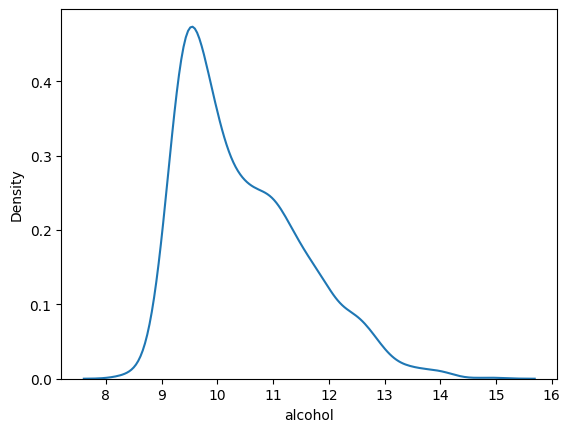

In [20]:
sns.distplot(df['alcohol'] , hist=False)

<ipython-input-21-6fb07a89e05f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pH'] , hist=False)


<Axes: xlabel='pH', ylabel='Density'>

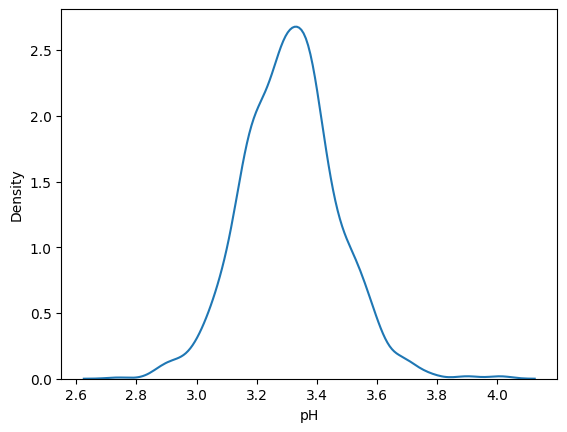

In [21]:
sns.distplot(df['pH'] , hist=False)

In [26]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(df.drop('quality' , axis=1) , df['quality'] , test_size=0.3 , random_state=0)

X_train.shape , X_test.shape

((800, 2), (343, 2))

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns=X_test.columns)

In [29]:
np.round(X_train.describe() , 1)

,pH,alcohol
count,800.0,800.0
mean,3.3,10.5
std,0.2,1.1
min,2.9,8.4
25%,3.2,9.5
50%,3.3,10.2
75%,3.4,11.2
max,4.0,14.9


In [30]:
np.round(X_test_scaled.describe() , 1)

,pH,alcohol
count,343.0,343.0
mean,0.4,0.3
std,0.1,0.2
min,-0.1,0.0
25%,0.3,0.2
50%,0.4,0.3
75%,0.5,0.4
max,0.7,0.8


<Axes: xlabel='pH', ylabel='alcohol'>

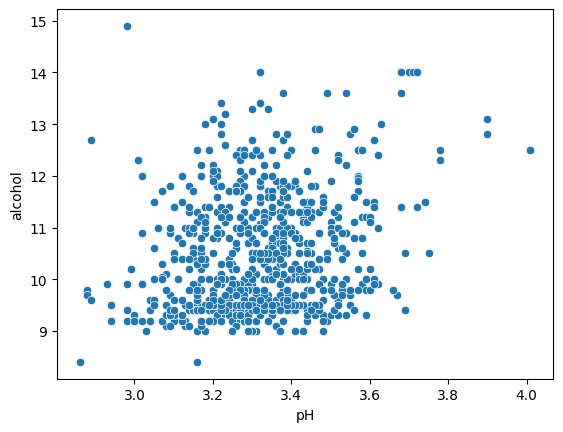

In [31]:
sns.scatterplot(x='pH' , y='alcohol' , data=X_train)

<Axes: xlabel='pH', ylabel='alcohol'>

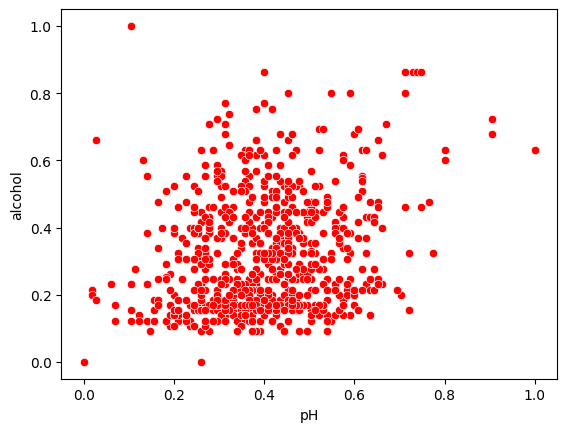

In [33]:
sns.scatterplot(x='pH' , y='alcohol' , data=X_train_scaled , color = 'red')

<ipython-input-34-a71f11139267>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['pH'] , hist=False)
<ipython-input-34-a71f11139267>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['alcohol'] , hist=False)


<Axes: xlabel='alcohol', ylabel='Density'>

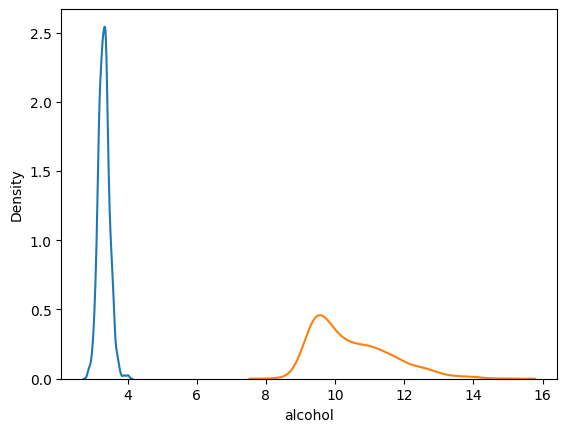

In [34]:
sns.distplot(X_train['pH'] , hist=False)
sns.distplot(X_train['alcohol'] , hist=False)

<ipython-input-35-8eb45e0768b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled['pH'] , hist=False)
<ipython-input-35-8eb45e0768b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled['alcohol'] , hist=False)


<Axes: xlabel='alcohol', ylabel='Density'>

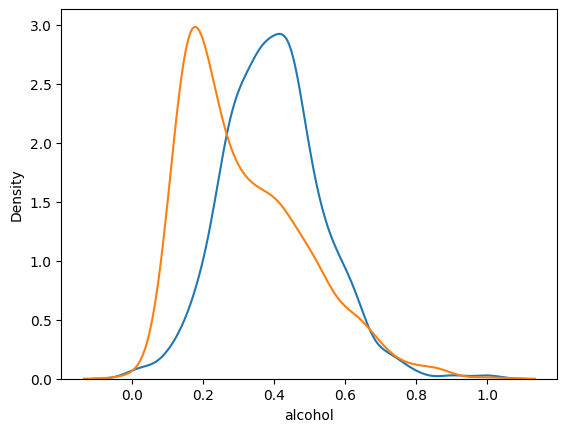

In [35]:
sns.distplot(X_train_scaled['pH'] , hist=False)
sns.distplot(X_train_scaled['alcohol'] , hist=False)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [37]:
lr.fit(X_train , Y_train)
lr_scaled.fit(X_train_scaled , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [39]:
from sklearn.metrics import accuracy_score
print("Actual : ",accuracy_score(Y_test,y_pred))
print("Scaled : ",accuracy_score(Y_test,y_pred_scaled))

Actual :  0.6005830903790087
Scaled :  0.6005830903790087
